# Exit Survey Analysis
In this project, we will be working with a couple of different datasets to analyze employee resignations.  We will be using the exit surveys from the Department of Education, Training and Employment (DETE) and the Technical and Further Education institutue (TAFE). 

We're interested in discovering possible reasons for an employee to resign.  We'll be investigating the following:
- Does the length of employement influence them resigning due to dissatisfaction?
- Does the actual age of the employee influence them resigning due to dissatisfaction?
- What about other reasons for resigning?  ie. Lack of Recognition, Work Life Balance, etc.

Both surverys were supposed to follow the same template.  However, there was some individual customization to the datasets.  In order to merge the two datasets and run our analysis accurately, we will have to clean the data.

# Read in the data and become familiarized with both datasets
We can begin by importing the necessary libraries and reading in the data.

In [1]:
import numpy as np
import pandas as pd

In [2]:
dete_survey = pd.read_csv('dete_survey.csv')
tafe_survey = pd.read_csv('tafe_survey.csv')

To get familiarized with the dataset, we can run <code>.info()</code> on the dataframe and we'll see the column names, types, and overall quantity of non-null objects.  We can also take a look at the dataframe itself to get familiarized with the columns and data for each row.

In [3]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

In [4]:
dete_survey.tail()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
817,819,Age Retirement,02/2014,1977,1999,Teacher,Primary,Central Queensland,NaN,Permanent Part-time,...,A,A,SA,Female,56-60,NaN,NaN,NaN,NaN,NaN
818,820,Age Retirement,01/2014,1980,1980,Teacher,Secondary,North Coast,NaN,Permanent Full-time,...,N,N,N,Male,51-55,NaN,NaN,NaN,NaN,NaN
819,821,Resignation-Move overseas/interstate,01/2014,2009,2009,Public Servant,A01-A04,Central Office,Education Queensland,Permanent Full-time,...,A,N,A,Female,31-35,NaN,NaN,NaN,NaN,NaN
820,822,Ill Health Retirement,12/2013,2001,2009,Teacher,Secondary,Darling Downs South West,NaN,Permanent Full-time,...,A,N,A,Female,41-45,NaN,NaN,NaN,NaN,NaN
821,823,Resignation-Move overseas/interstate,12/2013,Not Stated,Not Stated,Teacher Aide,NaN,Metropolitan,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


To get a better idea of total null values for each column, we can look at the sum of the <code>.isnull()</code> on the dataframe.

In [5]:
dete_survey.isnull().sum()

ID                                       0
SeparationType                           0
Cease Date                               0
DETE Start Date                          0
Role Start Date                          0
Position                                 5
Classification                         367
Region                                   0
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

Now that we are familiarized with the DETE dataset, we can do the same for the TAFE dataset.

In [6]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

In [7]:
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [8]:
tafe_survey.isnull().sum()

Record ID                                                                      0
Institute                                                                      0
WorkArea                                                                       0
CESSATION YEAR                                                                 7
Reason for ceasing employment                                                  1
                                                                            ... 
CurrentAge. Current Age                                                      106
Employment Type. Employment Type                                             106
Classification. Classification                                               106
LengthofServiceOverall. Overall Length of Service at Institute (in years)    106
LengthofServiceCurrent. Length of Service at current workplace (in years)    106
Length: 72, dtype: int64

# Cleaning the data and merging the datasets together
Both datasets have quite a bit of NaN values.  We also have a lot of columns that are similar, but have different names.  ie. 
- dete_survey : ID 
- tafe_survey : Record ID.

and

- dete_survey : SeparationType
- tafe_survey : Reason for ceasing employment

There are a fair amount of columns in both datasets that don't align or are uneccesary for our analysis, so we'll need to remove them.

We need to filter on only resignations since this is where our analysis is focused on.

We can also see that in the dete_survey, there are some values 'Not Stated' and those should be NaN, so we'll need to fill those.  For example, in Role Start Date.

Lastly, there are multiple columns that relate to Job Dissasitisfaction and those need to be combined.

In [9]:
#Reread the DETE survey back in, now replacing 'Not Stated' with NaN
dete_survey = pd.read_csv('dete_survey.csv',na_values = 'Not Stated')

In [10]:
#Mass drop the columns not needed for the analysis
dete_survey_updated = dete_survey.drop(dete_survey.columns[51:56], axis = 1)
dete_survey_updated = dete_survey_updated.drop(dete_survey.columns[28:49], axis = 1)
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis = 1)

We'll need to look at the columns names for both DETE and TAFE so we can remap them to coincide with eachother.


In [11]:
print('DETE: ', dete_survey_updated.columns)
print('-----------------------------------------------------------------')
print('TAFE: ', tafe_survey_updated.columns)

DETE:  Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Gender', 'Age'],
      dtype='object')
-----------------------------------------------------------------
TAFE:  Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributi

The first step is we should replace spaces from the column names with '_' to prevent workflow hiccups and make sure everything is lowercase.

In [12]:
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.strip().str.replace(' ','_')
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age'],
      dtype='object')

Now we will need to rename the columns in TAFE so they align with DETE.  We'll leave dissatsifaction ones alone because these need to be combined first.  We'll also have to combine 'study/travel' and 'other'.

In [13]:
tafe_mapping = {'Record ID':'id','CESSATION YEAR':'cease_date',
               'Reason for ceasing employment':'separationtype',
                'Contributing Factors. Career Move - Public Sector ':'career_move_to_public_sector',
                'Contributing Factors. Career Move - Private Sector ':'career_move_to_private_sector',
                'Contributing Factors. Ill Health':'ill_health',
                'Contributing Factors. Maternity/Family':'maternity/family',
                'Contributing Factors. Interpersonal Conflict':'interpersonal_conflicts',
                'Contributing Factors. NONE':'none_of_the_above',
                'Gender. What is your Gender?':'gender',
               'CurrentAge. Current Age':'age','Employment Type. Employment Type':'employment_status','Classification. Classification':'position',
               'LengthofServiceOverall. Overall Length of Service at Institute (in years)':'institute_service'
               ,'LengthofServiceCurrent. Length of Service at current workplace (in years)':'role_service'}
tafe_survey_updated = tafe_survey_updated.rename(tafe_mapping, axis = 1)

#self-employment not in dete so we'll drop that one
tafe_survey_updated = tafe_survey_updated.drop(['Contributing Factors. Career Move - Self-employment'], axis=1)
tafe_survey_updated.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'career_move_to_public_sector', 'career_move_to_private_sector',
       'ill_health', 'maternity/family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction', 'interpersonal_conflicts',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'none_of_the_above', 'gender', 'age',
       'employment_status', 'position', 'institute_service', 'role_service'],
      dtype='object')

# Focusing on only resignations
We're only concerned with employees who resigned, so we should filter the data on only this metric.  We need to continue cleaning before we can merge the datasets together.

We can take a look at the different values for separation type in both datasets so we can filter for resignation only.

In [14]:
dete_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [15]:
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

TAFE only has one resignation answer, so we can create our new tafe dateframe easily.  However, DETE has three different resignation types, so we'll need to combine them into one.

In [16]:
tafe_resignations = tafe_survey_updated[tafe_survey_updated['separationtype'] == 'Resignation'].copy()

In [17]:
dete_survey_updated['separationtype'] = dete_survey_updated['separationtype'].str.split('-').str[0]
dete_survey_updated['separationtype'].value_counts()

Resignation                         311
Age Retirement                      285
Voluntary Early Retirement (VER)     67
Ill Health Retirement                61
Other                                49
Contract Expired                     34
Termination                          15
Name: separationtype, dtype: int64

In [18]:
#create our dete resignations only dataframe.
dete_resignations = dete_survey_updated[dete_survey_updated['separationtype'] == 'Resignation'].copy()

We can take a quick look at some of the values for each column in each dataset and determine what needs to be cleaned so when we merge the data will make sense.

In [19]:
dete_resignations.head(2)

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,maternity/family,relocation,study/travel,ill_health,traumatic_incident,work_life_balance,workload,none_of_the_above,gender,age
3,4,Resignation,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,False,False,False,False,False,Female,36-40
5,6,Resignation,05/2012,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,True,False,False,False,False,False,False,False,Female,41-45


In [20]:
tafe_resignations.head(2)

,id,Institute,WorkArea,cease_date,separationtype,career_move_to_public_sector,career_move_to_private_sector,ill_health,maternity/family,Contributing Factors. Dissatisfaction,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,none_of_the_above,gender,age,employment_status,position,institute_service,role_service
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


It seems that 'cease_date' has different values amongst the dataframes.  We can begin there.

In [21]:
#Check the different values for 'cease_date'.
tafe_resignations['cease_date'].value_counts()

2011.0    116
2012.0     94
2010.0     68
2013.0     55
2009.0      2
Name: cease_date, dtype: int64

In [22]:
dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
11/2013      9
07/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
07/2006      1
09/2010      1
2010         1
07/2012      1
Name: cease_date, dtype: int64

The cease date in the DETE dataset includes the month for some of the values.  We'll need to remove the '/' and extract out just the year.

In [23]:
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.split('/').str[-1].astype('float')

In [24]:
dete_resignations['cease_date'].value_counts()

2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

The TAFE dataset has a column named 'institute_service' that contains total employment time.  Unfortunately DETE does not, but we can easily create that column by subracting cease_date from dete_start_date.

In [25]:
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']

In [26]:
tafe_resignations['institute_service'].value_counts()

Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
7-10                  21
More than 20 years    10
Name: institute_service, dtype: int64

Since we created a float number for institute service in the DETE dataset we'll need to do the same to the TAFE dataset.

In [27]:
tafe_resignations['institute_service'] = tafe_resignations['institute_service'].astype(str).str.extract(r'(\d+)').astype(float)

In [28]:
tafe_resignations['institute_service'].value_counts()

1.0     137
3.0      63
5.0      33
11.0     26
7.0      21
20.0     10
Name: institute_service, dtype: int64

The age columns also don't align amongst both datasets and is in a range similar to how institute service was.  Let's convert them both to floats as well.

In [29]:
dete_resignations['age'] = dete_resignations['age'].astype(str).str.extract(r'(\d+)').astype(float)
tafe_resignations['age'] = tafe_resignations['age'].astype(str).str.extract(r'(\d+)').astype(float)

The TAFE dataset has multiple columns that reference dissatsifaction.  We should combine these into one overall dissatisfied column. We can look to see what the values are to see if there will be an easy way to combine them.

In [30]:
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts(dropna=False)

-                                         277
Contributing Factors. Dissatisfaction      55
NaN                                         8
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [31]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts(dropna=False)

-                      270
Job Dissatisfaction     62
NaN                      8
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

We can see that there are '-' and 'NaN' values.  We can create a function that will only return True if there is something other than those values.  This way we can combine them into one column.  We'll do the same for the Study and Travel columns.

In [32]:
def update_vals(val):
    if pd.isnull(val):
        return np.nan
    elif val == '-':
        return False
    else:
        return True
tafe_resignations['dissatisfied'] = tafe_resignations[['Contributing Factors. Dissatisfaction',
                                                       'Contributing Factors. Job Dissatisfaction']
                                                     ].applymap(update_vals).any(1, skipna = False)

In [33]:
tafe_resignations['study/travel'] = tafe_resignations[['Contributing Factors. Study',
                                                      'Contributing Factors. Travel']
                                                     ].applymap(update_vals).any(1, skipna = False)

In [34]:
#Let's create a copy of this dataframe before we merge in the event of mistakes.
tafe_resignations_up = tafe_resignations.copy()

#We can double check that all looks well in the dissatsified column
tafe_resignations_up['dissatisfied'].value_counts(dropna=False)

False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

There are quite a few columns that signify job dissatisfaction in DETE.  Let's combine all of them.

In [35]:
dete_resignations['dissatisfied'] = dete_resignations[['job_dissatisfaction',
                                                       'dissatisfaction_with_the_department',
                                                       'physical_work_environment',
                                                       'lack_of_recognition','lack_of_job_security',
                                                       'work_location','employment_conditions',
                                                       'work_life_balance','workload']].any(1,skipna = False) 

In [36]:
dete_resignations['dissatisfied'].value_counts(dropna=False)

False    162
True     149
Name: dissatisfied, dtype: int64

In [37]:
#create the copy here as well.
dete_resignations_up = dete_resignations.copy()

# Merge the Datasets together
Now that we have finished cleaning the data, we can finally combine the datasets.  Before we do that, we should add a column to both datasets named 'institute' so we can differentiate between the two surveys.

In [38]:
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'

We can easily combine the two dataset by using concatenate.  It just stacks the two ontop of eachother.

In [39]:
combined = pd.concat([dete_resignations_up,tafe_resignations_up], ignore_index = True)

In [40]:
#Now that we're combined.  Let's take a quick look at the columns that have the most non_null values.
combined.notnull().sum().sort_values(ascending=False)

id                                           651
separationtype                               651
institute                                    651
none_of_the_above                            643
career_move_to_public_sector                 643
career_move_to_private_sector                643
interpersonal_conflicts                      643
study/travel                                 643
ill_health                                   643
maternity/family                             643
dissatisfied                                 643
cease_date                                   635
position                                     598
employment_status                            597
age                                          596
gender                                       592
institute_service                            563
Institute                                    340
WorkArea                                     340
Contributing Factors. Travel                 332
Contributing Factors

Since there are a fair amount of columns with null values, we'll want to remove those for our analysis.  Given that our first analysis is  focusing on dissatisfied and the length of employement, we'll want to make sure we don't drop the 'institute_service' column.  We can see that 'insitute_service' has 563 non-null values, so we can safely drop anything that is less than 500 non_null values.

In [41]:
combined_updated = combined.dropna(thresh=500, axis = 1).copy()
combined_updated.notnull().sum()

id                               651
separationtype                   651
cease_date                       635
position                         598
employment_status                597
career_move_to_public_sector     643
career_move_to_private_sector    643
interpersonal_conflicts          643
maternity/family                 643
study/travel                     643
ill_health                       643
none_of_the_above                643
gender                           592
age                              596
institute_service                563
dissatisfied                     643
institute                        651
dtype: int64

To create better visualizations, we can standardize the institute_service column to have a few different career stages

In [42]:
def career_stages(x):
    if x >= 11:
        return 'Veteran'
    elif 7 <= x < 11:
        return 'Established'
    elif 3 <= x < 6:
        return 'Experienced'
    elif pd.isnull(x):
        return np.nan
    else:
        return 'New'
combined_updated['service_cat'] = combined_updated['institute_service'].apply(career_stages)
combined_updated['service_cat'].value_counts(dropna=False)

New            210
Experienced    155
Veteran        136
NaN             88
Established     62
Name: service_cat, dtype: int64

In [43]:
#Let's check the values of the 'dissatsified' columns to see if we need to clean it at all
combined_updated['dissatisfied'].value_counts(dropna = False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

In [44]:
#Since NaN would more than likely mean False, let's fill it as such.
combined_updated['dissatisfied'] = combined_updated['dissatisfied'].fillna(False)

# Visualize Resignation Due to Dissatisfaction Based on Career Stage
Now that we have everything merged and cleaned.  We can begin our analysis.  We can start by creating a simple pivot table and then visualzing the pivot table as a bar plot.

In [45]:
dis_piv = combined_updated.pivot_table(index = 'service_cat', values = 'dissatisfied')
dis_piv = dis_piv.sort_values('dissatisfied')
dis_piv

,dissatisfied
service_cat,
Experienced,0.316129
New,0.319048
Veteran,0.485294
Established,0.516129


Text(0.5, 0, 'Career Stage')

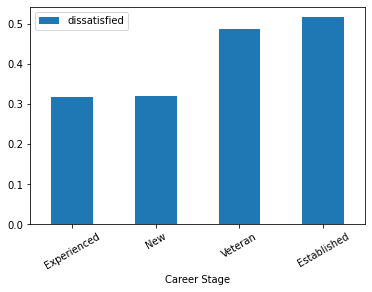

In [46]:
%matplotlib inline
ax = dis_piv.plot.bar(rot = 30)
ax.set_xlabel('Career Stage')

From these results, it seems that employees with over 7+ years of experience are more like to resign from dissastisfaction.

# Visualizing Age as Reasons for Resignation
Since age doesn't always mean that the employee has been with the company for long, it may be interesting to see how the employees age can affect resignation.

We can create a function here that will label the employees into different age groups.  Then we can create a pivot table and visualize the age groups.

In [47]:
combined_updated['age'].value_counts(dropna=False)

41.0    93
46.0    81
36.0    73
51.0    71
26.0    67
21.0    62
31.0    61
NaN     55
56.0    55
61.0    23
20.0    10
Name: age, dtype: int64

In [48]:
def age_group(age):
    age = str(age)
    if age.startswith('2'):
        return '20s'
    elif age.startswith('3'):
        return '30s'
    elif age.startswith('4'):
        return '40s'
    elif age.startswith('5'):
        return '50s'
    elif age.startswith('6'):
        return '60s'
    else:
        return np.nan
combined_updated['age_group'] = combined_updated['age'].apply(age_group)
combined_updated['age_group'].value_counts(dropna=False)
    

40s    174
20s    139
30s    134
50s    126
NaN     55
60s     23
Name: age_group, dtype: int64

In [49]:
age_dis_pivot = combined_updated.pivot_table(index='age_group', values= 'dissatisfied')
age_dis_pivot

,dissatisfied
age_group,
20s,0.352518
30s,0.358209
40s,0.379310
50s,0.404762
60s,0.521739


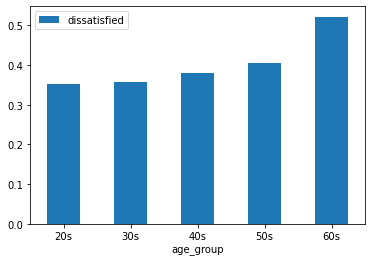

In [50]:
age_dis_pivot.plot.bar(rot=0)

The older the employee is, the higher chance of dissastisfaction.  Chances are that this likely correlates with career stage.

# Other reasons for Resignation
Since we just focused on dissatisfaction, we should explore other reasons for resignation and see how it correlates with career stages, age, and even job titles.

In [51]:
#create a copy to fall back on
combined_updated_cleaned = combined_updated.copy()

In [52]:
#We want to rearrange the columns to help clean them faster
combined_updated_cleaned = combined_updated_cleaned[['id', 'separationtype','cease_date','position','employment_status',
                                                   'gender','age','institute_service','institute','service_cat',
                                                    'age_group', 'career_move_to_public_sector','career_move_to_private_sector',
                                                   'interpersonal_conflicts','maternity/family','study/travel',
                                                   'ill_health','none_of_the_above','dissatisfied']]
combined_updated_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             651 non-null    float64
 1   separationtype                 651 non-null    object 
 2   cease_date                     635 non-null    float64
 3   position                       598 non-null    object 
 4   employment_status              597 non-null    object 
 5   gender                         592 non-null    object 
 6   age                            596 non-null    float64
 7   institute_service              563 non-null    float64
 8   institute                      651 non-null    object 
 9   service_cat                    563 non-null    object 
 10  age_group                      596 non-null    object 
 11  career_move_to_public_sector   643 non-null    object 
 12  career_move_to_private_sector  643 non-null    obj

In [53]:
#Replace '-' and NaN with False.
def update_vals_2(val):
    if pd.isnull(val):
        return False
    elif val == '-':
        return False
    elif val == False:
        return False
    else:
        return True

for column in combined_updated_cleaned.columns[11:18]:
    combined_updated_cleaned[column] = combined_updated_cleaned[column].apply(update_vals_2)

# Top reasons for resignation grouped by career stage

Now that we have all the columns ready for analysis, we can run a large <code>.groupby</code> to aggregate the data based off the means for leaving based on career stage.  We can then visualize this with a bar plot.

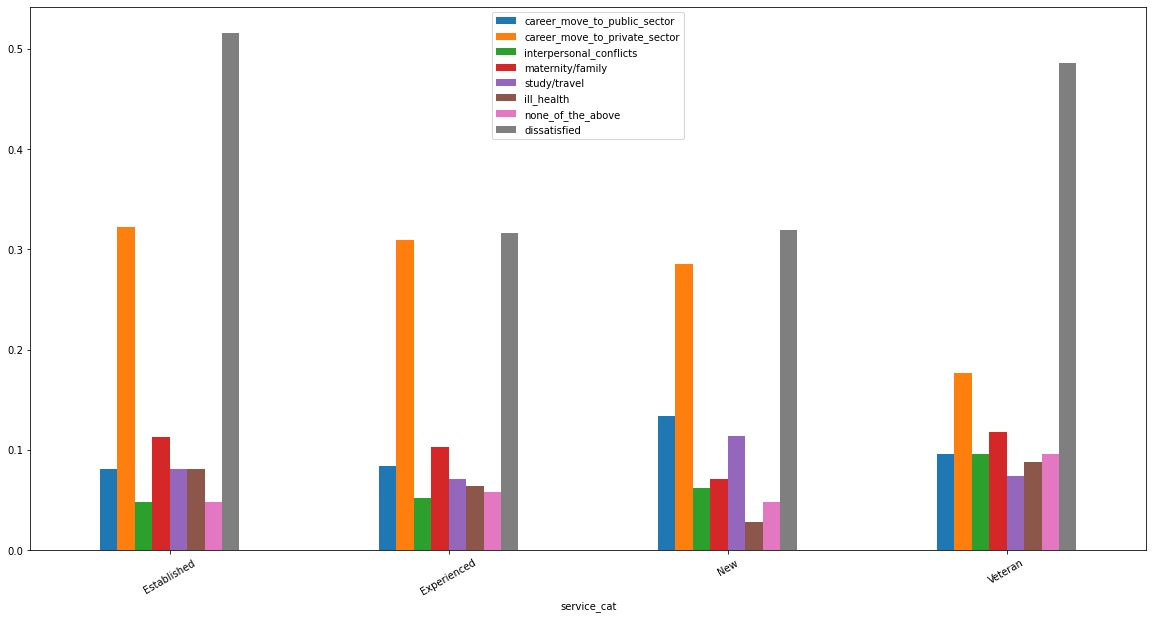

In [54]:
combined_updated_cleaned_career_stage = combined_updated_cleaned.groupby('service_cat').agg('mean')
combined_updated_cleaned_career_stage.iloc[:,-8:].plot.bar(rot = 30, figsize = (20,10))

It seems that the 2 main reasons for leaving the job is either dissastisfaction or a career shift to the private sector.  Every category besides Veterans seem to be leaving quite a bit to a new sector.  

# Resignation reasons based on Age
In the above bar plot, we can see that Established, Experienced, and New all left to the private sector in similar volume.  We should run a similar group by for Age, to see if can uncover any other trends.

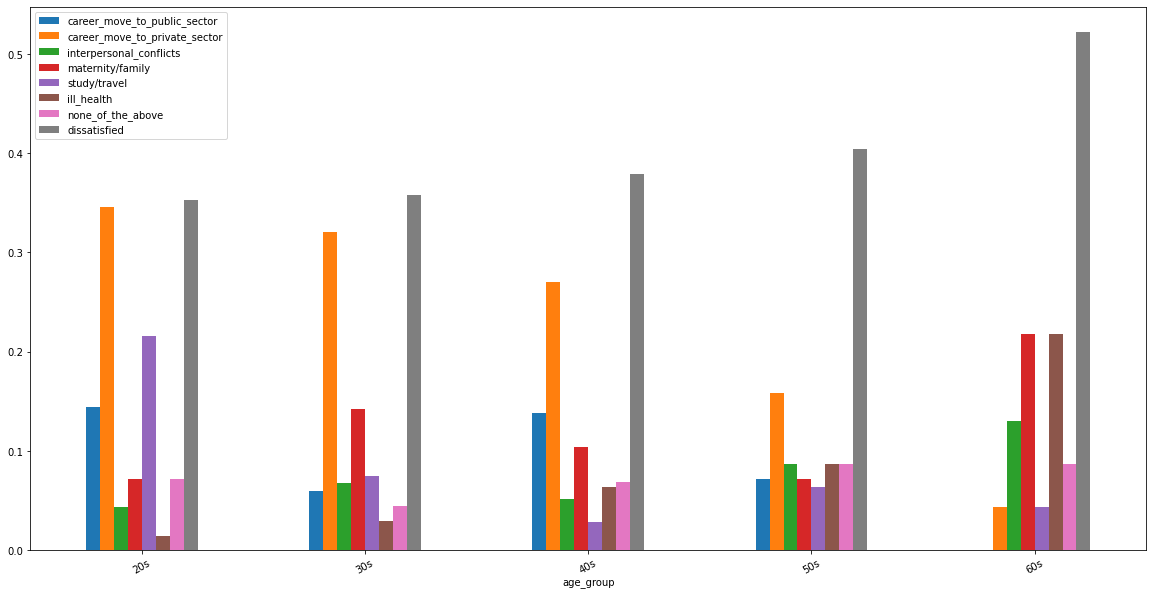

In [55]:
combined_updated_cleaned_age_group = combined_updated_cleaned.groupby('age_group').agg('mean')
combined_updated_cleaned_age_group.iloc[:,-8:].plot.bar(rot = 30, figsize = (20,10))

Compared to career stage, if we look just based on age, the older the employee got, the less likely they were to leave to a new sector and the more likely the were to leave due to dissastisfaction or maternity/family and ill health.  Also, those in the 20's were likely to leave to go study or travel.

# Resignations by gender
Since we looked at age and career stage, it may be interesting to see how gender affects resignation.

In [56]:
combined_updated_cleaned['gender'].value_counts()

Female    424
Male      168
Name: gender, dtype: int64

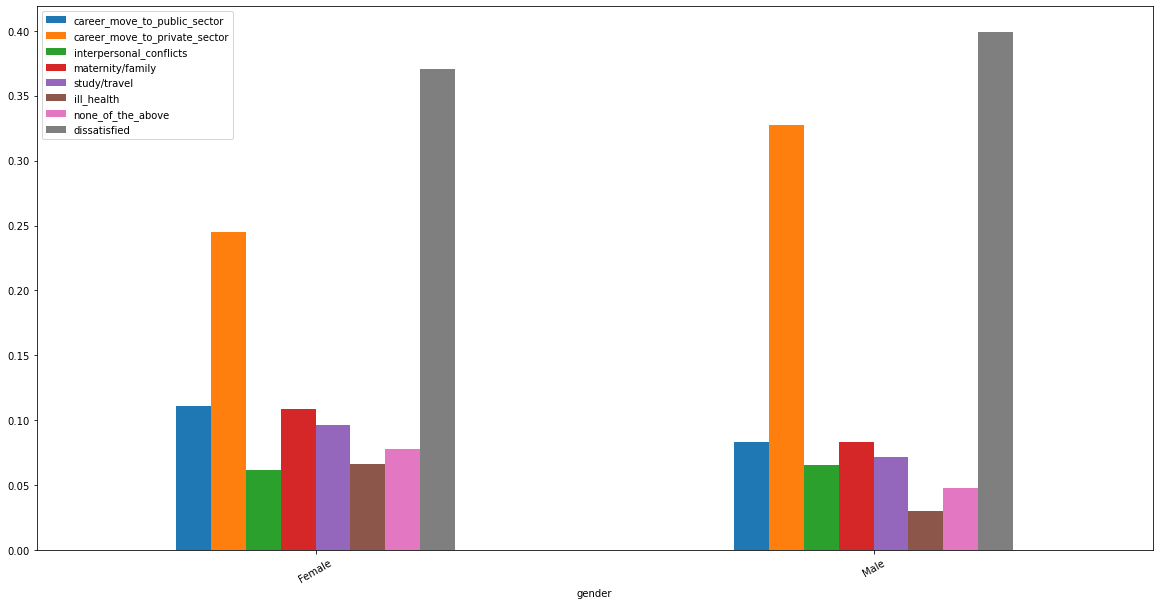

In [57]:
#Run a groupby based on the means of each reason for leaving based on gender and plot it
combined_updated_cleaned_gender = combined_updated_cleaned.groupby('gender').agg('mean')
combined_updated_cleaned_gender.iloc[:,-8:].plot.bar(rot = 30, figsize = (20,10))

There doesn't seem to be any glaring difference amongst gender.

# Comparing Surveys
Since we merged two different datasets from different companies.  Maybe there are bias's for either and we should explore that.

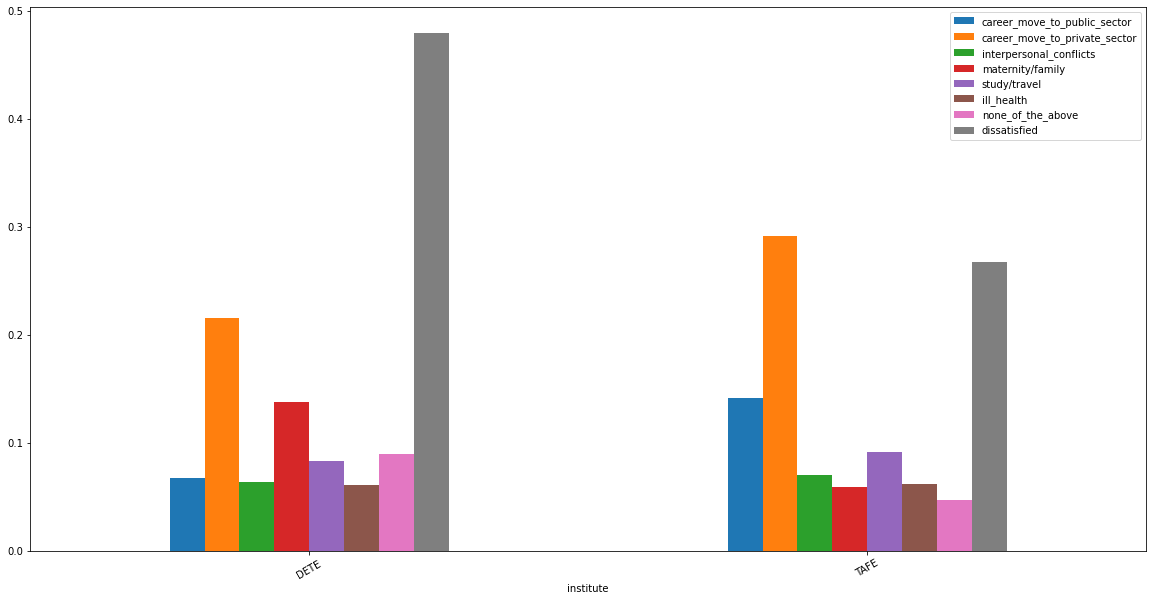

In [58]:
#Run a groupby based on the means of each reason for leaving based on institute and plot it
combined_updated_cleaned_institute = combined_updated_cleaned.groupby('institute').agg('mean')
combined_updated_cleaned_institute.iloc[:,-8:].plot.bar(rot = 30, figsize = (20,10))

Comparing the two surveys, it seems that those with DETE were significantly more dissatisfied.

# Resignations due to dissatisfaction by job title.
Lastly, we can take a look at overall dissatisfaction amongst position.  

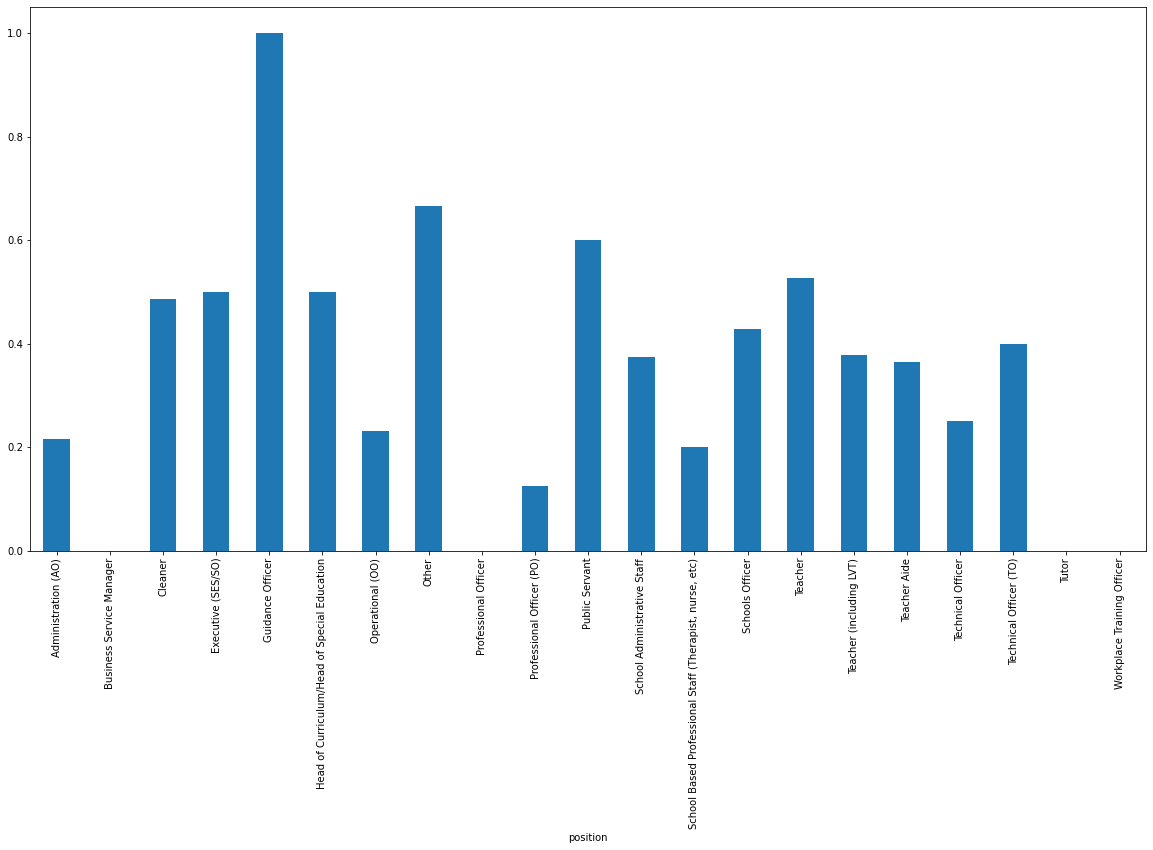

In [59]:
#Run a groupby based on the means of each reason for leaving based on position and plot it
combined_updated_cleaned_position = combined_updated_cleaned.groupby('position').agg('mean')
combined_updated_cleaned_position['dissatisfied'].plot.bar(figsize = (20,10))

In [60]:
combined_updated_cleaned['position'].value_counts()

Administration (AO)                                        148
Teacher                                                    129
Teacher (including LVT)                                     95
Teacher Aide                                                63
Cleaner                                                     39
Public Servant                                              30
Professional Officer (PO)                                   16
Operational (OO)                                            13
Head of Curriculum/Head of Special Education                10
Technical Officer                                            8
School Administrative Staff                                  8
Schools Officer                                              7
Workplace Training Officer                                   6
Technical Officer (TO)                                       5
School Based Professional Staff (Therapist, nurse, etc)      5
Executive (SES/SO)                                     

The most dissatisfied was the Guidance Officer, but looking at how many Guidance Officers there were in the dataset, we can see that there were only 3.  We should aggregate the data on sum instead of mean to find the job with the most dissatisfied employees.

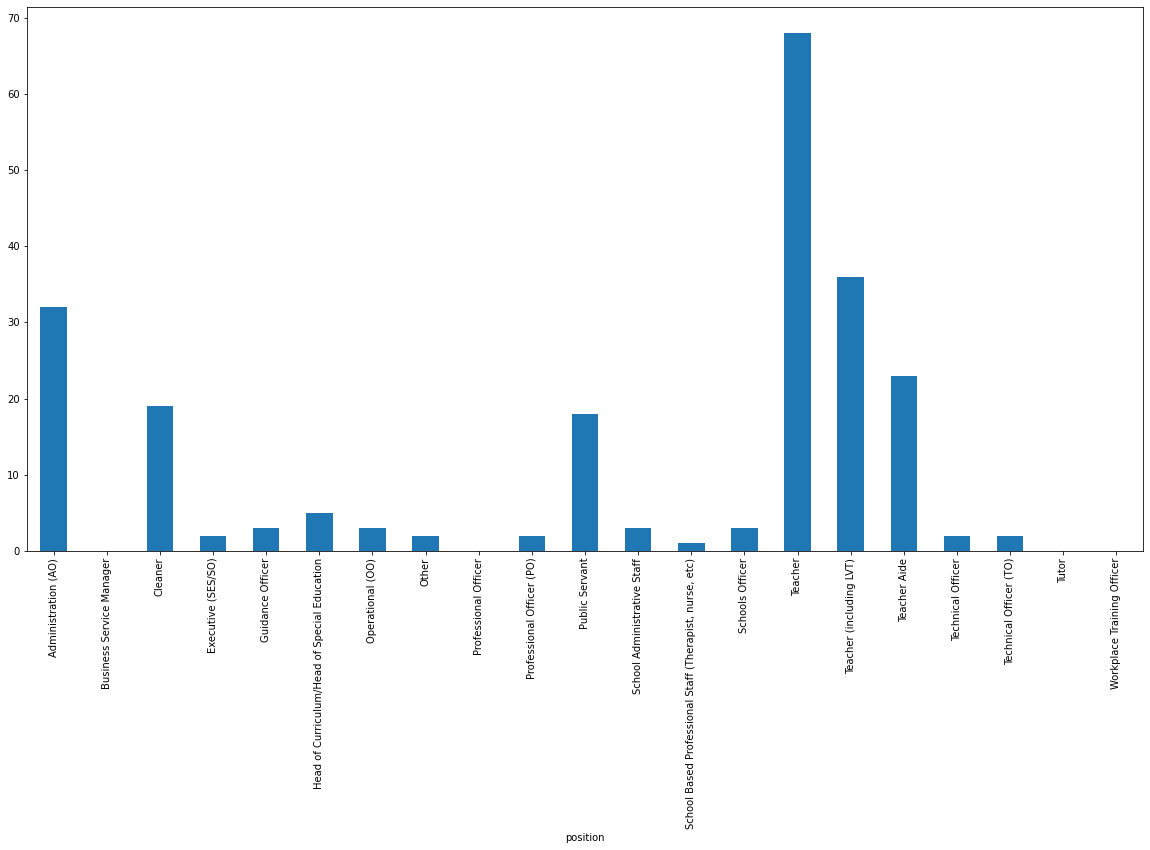

In [61]:
combined_updated_cleaned_position_sum = combined_updated_cleaned.groupby('position').agg('sum')
combined_updated_cleaned_position_sum['dissatisfied'].plot.bar(figsize = (20,10))

Based on total amount of dissatisfied employees, it seems being a teacher brings the most dissastisfaction.

# Conclusion
As we can see, there are many different ways to interpret the data.  Overall, however, it seems that the majority of the time, an employee leaves due to dissatisfaction and this becomes more apparent as the employee's tenure with the company becomes longer.  The younger and newer the employee, the more likely they'll be dissatisfied and leave to go work at a different job.  We can also see that being in the schooling industry increases the chances of being dissatisfied.